In [1]:
import numpy as np 
import math
import seaborn as sns
import tensorflow as tf
from numpy.ma.core import ceil
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<ipython-input-42-481d45398c94>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

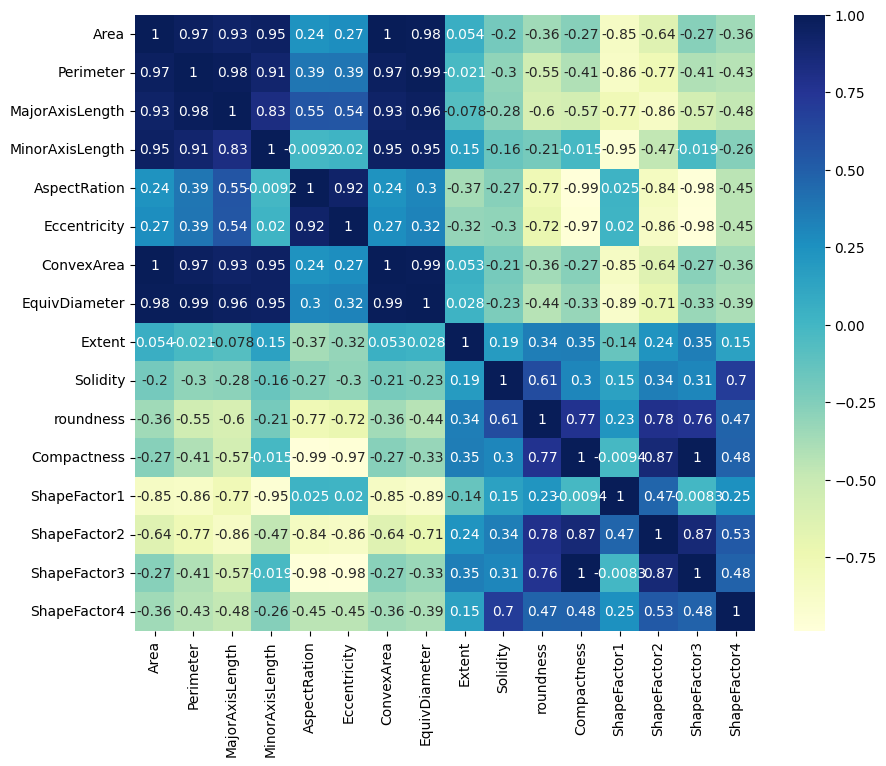

In [42]:
counts = df['Class'].value_counts()
print(counts)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)

In [3]:
X = df.drop('Class', axis = 1)
Y = df['Class']

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_normalized = standard_scaler.transform(X)
print(X_normalized)

Y_numerized = Y.replace(({'SEKER': 4, 'BARBUNYA' : 2, 'BOMBAY': 3, 'CALI': 0, 'DERMASON': 1, 'HOROZ': 6, 'SIRA': 5}))
print(Y_numerized)

[[-0.84074853 -1.1433189  -1.30659814 ...  2.40217287  1.92572347
   0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 ...  3.10089314  2.68970162
   0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 ...  2.23509147  1.84135576
   0.91675514]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.28920441  0.33632829
   0.39025114]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.22837538  0.2489734
   0.03644001]
 [-0.37135619 -0.38755718 -0.2917356  ... -0.12777587 -0.2764814
   0.71371948]]
0        4
1        4
2        4
3        4
4        4
        ..
13606    1
13607    1
13608    1
13609    1
13610    1
Name: Class, Length: 13611, dtype: int64


In [4]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_numerized, test_size=0.3, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(9527, 16) (9527,) (4084, 16) (4084,)


In [5]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16,1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [6]:
# Define the optimizer
model.fit(train_x, train_y, epochs=10, batch_size = 32)

Epoch 1/10
298/298 [==============================] - 6s 14ms/step - loss: 0.3931 - accuracy: 0.8667
Epoch 2/10
298/298 [==============================] - 3s 11ms/step - loss: 0.2348 - accuracy: 0.9140
Epoch 3/10
298/298 [==============================] - 4s 12ms/step - loss: 0.2173 - accuracy: 0.9210
Epoch 4/10
298/298 [==============================] - 5s 16ms/step - loss: 0.2085 - accuracy: 0.9231
Epoch 5/10
298/298 [==============================] - 3s 12ms/step - loss: 0.2037 - accuracy: 0.9276
Epoch 6/10
298/298 [==============================] - 3s 11ms/step - loss: 0.1946 - accuracy: 0.9274
Epoch 7/10
298/298 [==============================] - 3s 11ms/step - loss: 0.1894 - accuracy: 0.9297
Epoch 8/10
298/298 [==============================] - 4s 14ms/step - loss: 0.1840 - accuracy: 0.9317
Epoch 9/10
298/298 [==============================] - 3s 11ms/step - loss: 0.1800 - accuracy: 0.9311
Epoch 10/10
298/298 [==============================] - 4s 12ms/step - loss: 0.1770 - accura

In [8]:
y_pred = model.predict(test_x).argmax(axis=1)

accuracy = accuracy_score(test_y, y_pred)
print('Test accuracy:', accuracy)

128/128 [==============================] - 1s 4ms/step
Test accuracy: 0.9277668952007836


In [9]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[464   0   6   0   2   3   4]
 [  0 955   0   0  23  65   0]
 [ 33   0 351   0   2   8   1]
 [  0   0   0 161   0   0   0]
 [  0  11   5   0 594   9   0]
 [  4  64   1   0  14 708   8]
 [ 16   7   0   0   0   9 556]]


**Model Two CNN**


In [31]:
idx = np.where((train_y == 1) | (train_y == 5))[0]
cluster_Y = train_y.iloc[idx]
cluster_Y = np.where(train_y.iloc[idx]==1,0,1)

train_x_df = pd.DataFrame(train_x)
cluster_X = train_x_df.iloc[idx]
cluster_X = cluster_X.to_numpy()

In [32]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16,1)))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.25))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
model1.fit(cluster_X, cluster_Y, epochs = 10, batch_size = 32)

Epoch 1/10
136/136 [==============================] - 3s 11ms/step - loss: 0.2762 - accuracy: 0.8721
Epoch 2/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1865 - accuracy: 0.9171
Epoch 3/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1825 - accuracy: 0.9175
Epoch 4/10
136/136 [==============================] - 1s 8ms/step - loss: 0.1749 - accuracy: 0.9221
Epoch 5/10
136/136 [==============================] - 1s 8ms/step - loss: 0.1655 - accuracy: 0.9279
Epoch 6/10
136/136 [==============================] - 1s 8ms/step - loss: 0.1653 - accuracy: 0.9281
Epoch 7/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1686 - accuracy: 0.9260
Epoch 8/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1621 - accuracy: 0.9318
Epoch 9/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1616 - accuracy: 0.9306
Epoch 10/10
136/136 [==============================] - 1s 8ms/step - loss: 0.1566 - accuracy: 0.928

In [35]:
idx1 = np.where((test_y == 1) | (test_y == 5))[0]
cluster_Y_test = test_y.iloc[idx1]
cluster_Y_test = np.where(test_y.iloc[idx1]==1,0,1)

test_x_df = pd.DataFrame(test_x)
cluster_X_test = test_x_df.iloc[idx1]
cluster_X_test = cluster_X_test.to_numpy()

In [36]:
# Use the trained model to make predictions on the test set
new_y_pred = model1.predict(cluster_X_test).argmax(axis=1)

# Calculate the accuracy of the model on the test set
accuracy1 = accuracy_score(cluster_Y_test,new_y_pred)
print('Test accuracy:', accuracy1)

58/58 [==============================] - 0s 2ms/step
Test accuracy: 0.9261672095548317


In [37]:
cm1 = confusion_matrix(cluster_Y_test, new_y_pred)
print(cm1)

[[970  73]
 [ 63 736]]


In [39]:
new_y_pred = np.where(new_y_pred == 0,1,5)

In [40]:
updated_predicted_class = np.copy(y_pred)
np.put(updated_predicted_class,idx1,new_y_pred)
accuracy2 = accuracy_score(test_y, updated_predicted_class)
print(accuracy2)

0.9382957884427032


In [41]:
cm3 = confusion_matrix(test_y, updated_predicted_class)
print(cm3)

[[464   0   6   0   2   3   4]
 [  0 970   0   0   0  73   0]
 [ 33   0 351   0   2   8   1]
 [  0   0   0 161   0   0   0]
 [  0  11   5   0 594   9   0]
 [  0  63   0   0   0 736   0]
 [ 16   7   0   0   0   9 556]]


Discussion: 

The precision of the second CNN rose by 2%, despite predicting 2 fewer instances in class 1 and class 5. This improvement can be mainly attributed to a remarkable 70% increase in other classes. When compared to SOM, CNN outperforms because of its ability to learn hierarchical representations of input data, beginning with basic features like edges and shapes, and progressively advancing to more complex features that capture the overall structure.



